# Missing Value Treatment methods

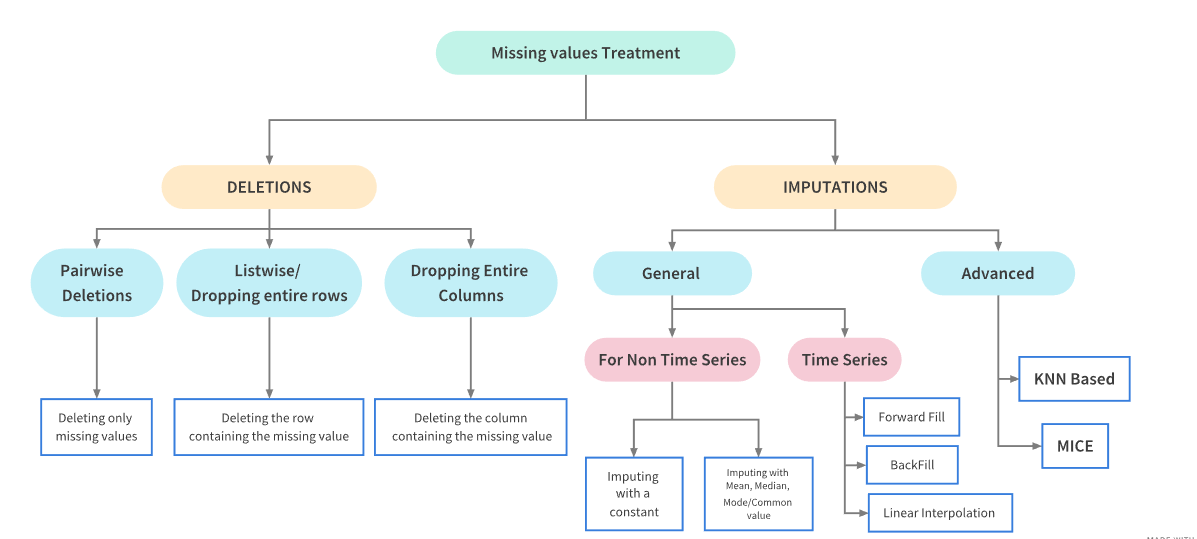

# Table of Contents

# 1. Objective

The objective of this notebook is to detect missing values and then go over some of the methods used for imputing them.

# 2. Data

# 3. Loading necessary libraries and datasets

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
import missingno as msno   # This Library is use for show missing values

In [3]:
 # Loading and Reading the dataset 

In [4]:
train=sns.load_dataset('titanic')

In [5]:
train.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [6]:
train['survived'].value_counts()

0    549
1    342
Name: survived, dtype: int64

<AxesSubplot:xlabel='survived', ylabel='count'>

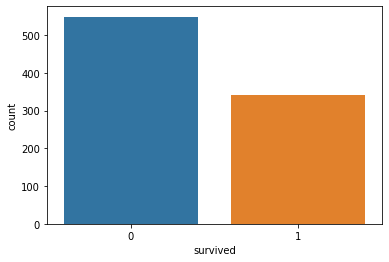

In [7]:
sns.countplot(x='survived',data=train)

# 4. Detecting Missing Values

# 4.1 Detecting Missing Values Manually

   The first step is to detect the count/percentage of missing values in every column of the dataset. This will give an idea       about the distribution of missing values.

In [8]:
def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns

In [9]:
missing_values_table(train)

Your selected dataframe has 15 columns.
There are 4 columns that have missing values.


,Missing Values,% of Total Values
deck,688,77.2
age,177,19.9
embarked,2,0.2
embark_town,2,0.2


# 4.2 Detecting Missing Values by Visual Representation

To graphically analyse the missingness of the data, let's use a library called Missingno It is a package for graphical analysis of missing values. To use this library, we need to import it as follows: import missingno as msno

<AxesSubplot:>

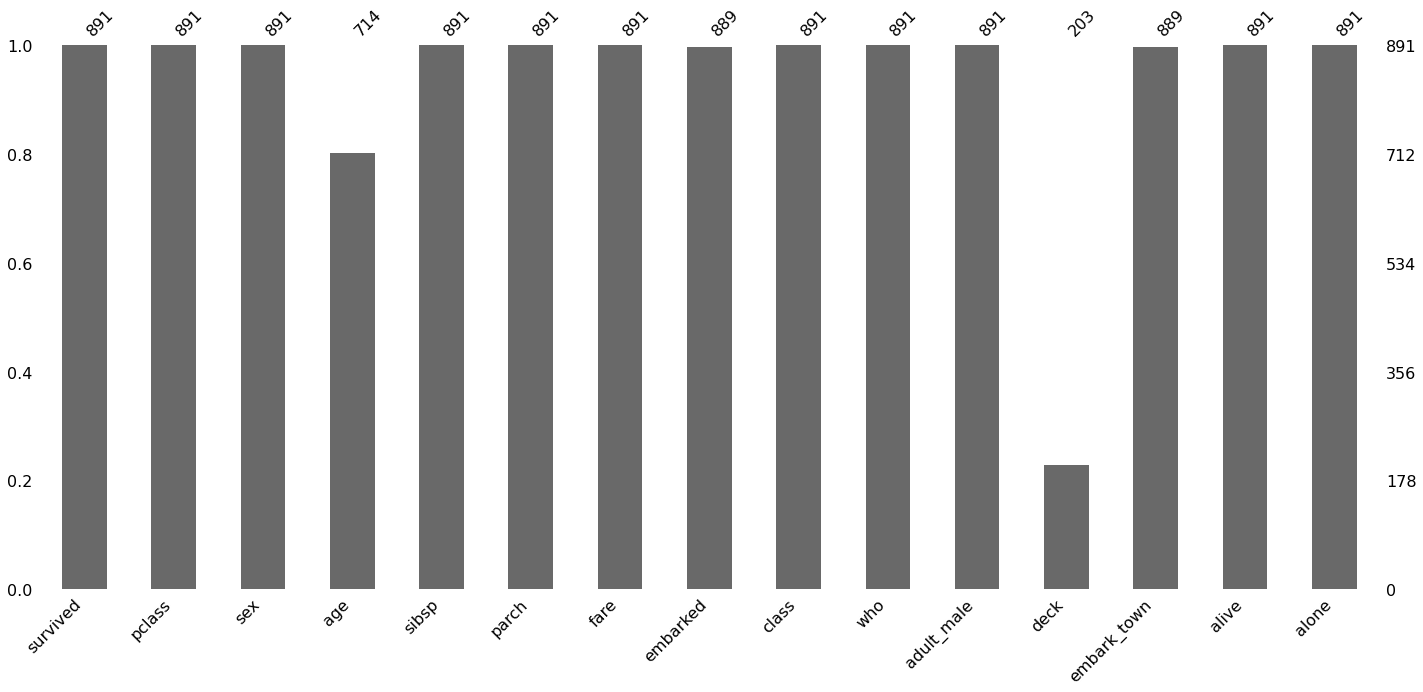

In [10]:
msno.bar(train)

The bar chart above gives a quick graphical overview of the completeness of the dataset. We can see that Age, Cabin and embarked columns have missing values. Next,it would make sense to find out the locations of the missing data.

Visualizing the locations of the missing data

<AxesSubplot:>

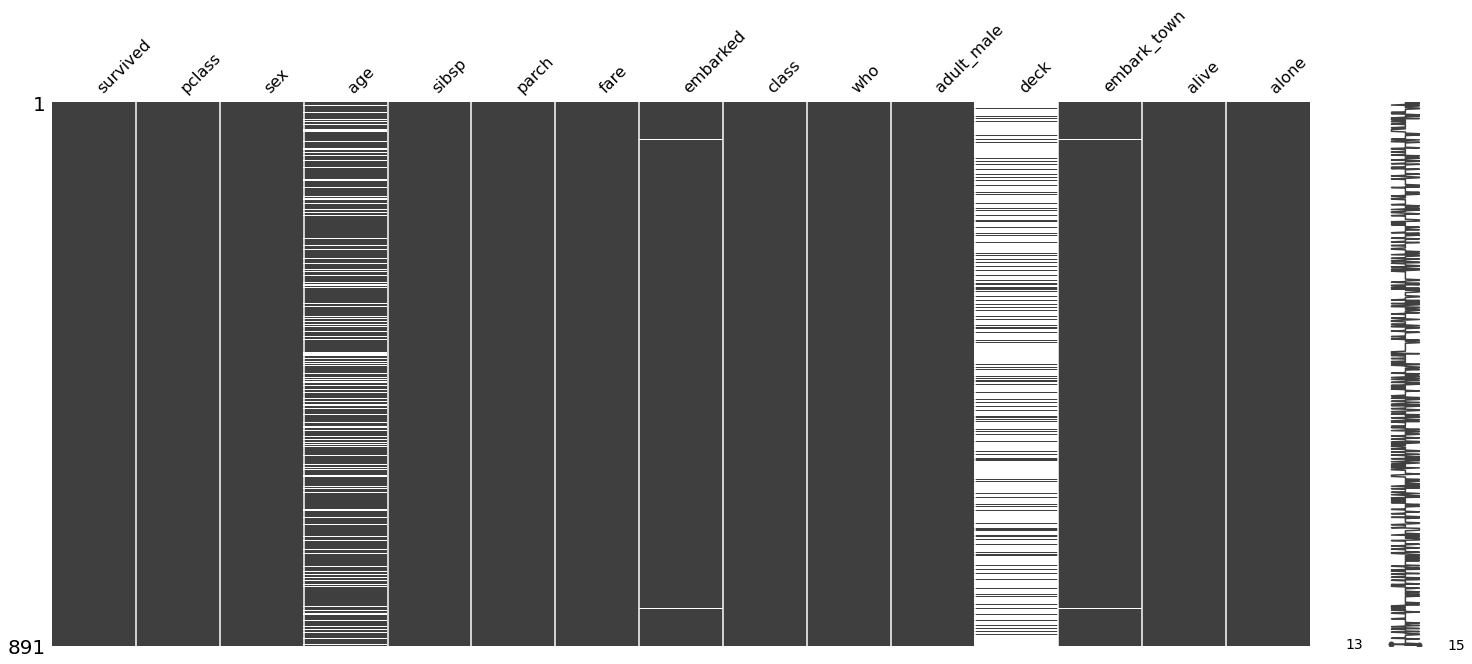

In [11]:
msno.matrix(train)

1. The plot appears blank(white) wherever there are missing values. For instance, in Embarked column there are only two      i    instances of missing data, hence the two white lines.

2. The sparkline on the right gives an idea of the general shape of the completeness of the data and points out the row with the minimum nullities and the total number of columns in a given dataset, at the bottom.

It is also possible to sample the dataset to pinpoint the exact location of the missing values. For instance let's check the first 100 rows.

<AxesSubplot:>

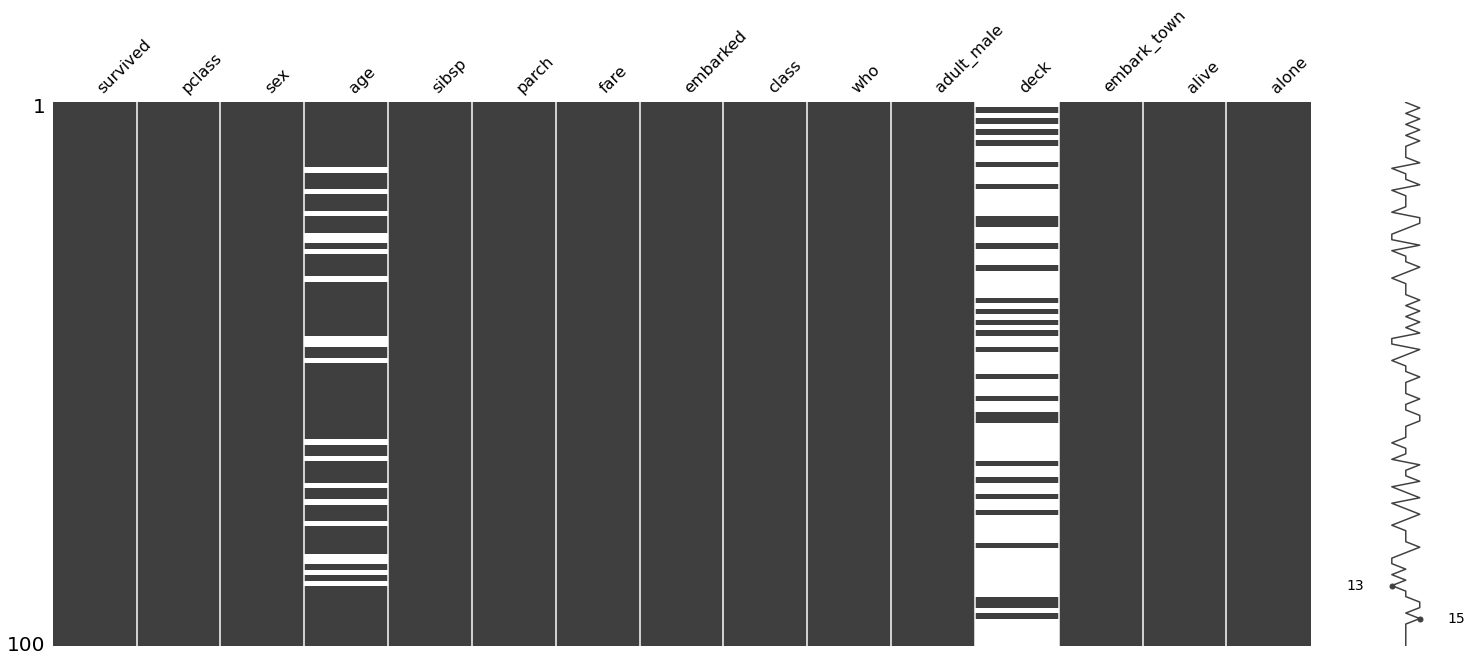

In [12]:
msno.matrix(train.sample(100))

This shows that the Embarked column has no nullity in the first 100 cases.

# 5.  Reasons for Missing Values

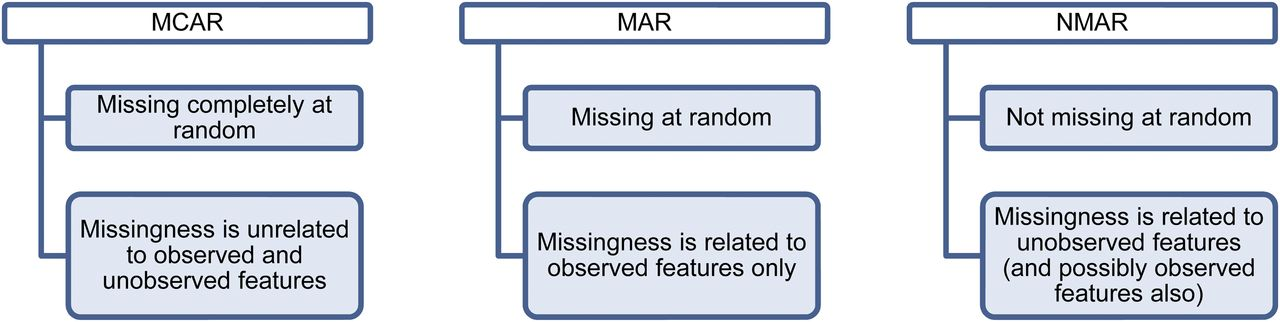

1. Missing Completely at Random (MCAR)

      The missing values on a given variable (Y) are not associated with other variables in a given data set or with the variable (Y) itself. In other words, there is no particular reason for the missing values.

2. Missing at Random (MAR)

      MAR occurs when the missingness is not random, but where missingness can be fully accounted for by variables where there is complete information.

3. Missing Not at Random (MNAR)

      Missingness depends on unobserved data or the value of the missing data itself.

<AxesSubplot:>

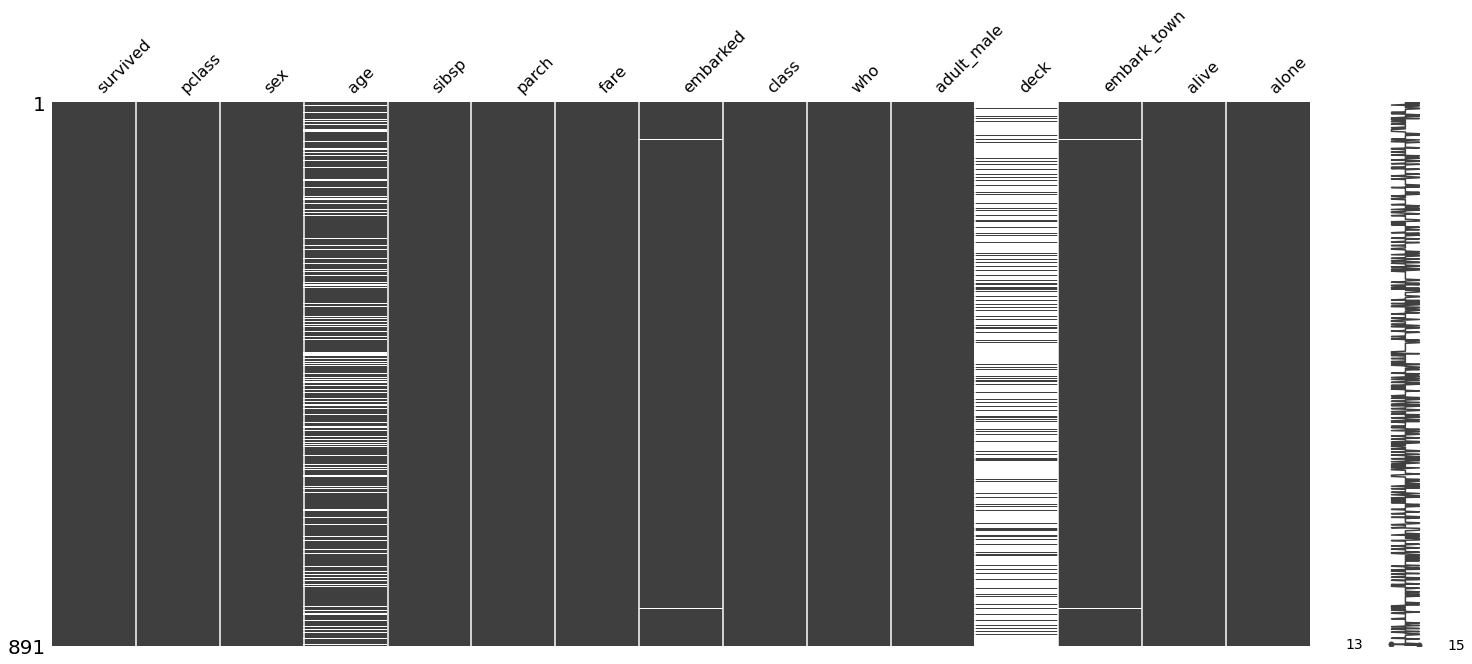

In [13]:
msno.matrix(train)

1. The Embarked Column has very few missing values and donot seem to be correlated with any other column, Hence, the    missingness in Embarked column can be attributed as Missing Completely at Random.
2. Both the Age and the Cabin columns have a lot of missing values.This could be a case of MAR as we cannot directly observe the reason for missingness of data in these columns.

The missingno package also let's us sort the graph by a particluar column. Let's sort the values by Age and Cabin column to see if there is a pattern in the missing values

In [14]:
sorted=train.sort_values('age')

<AxesSubplot:>

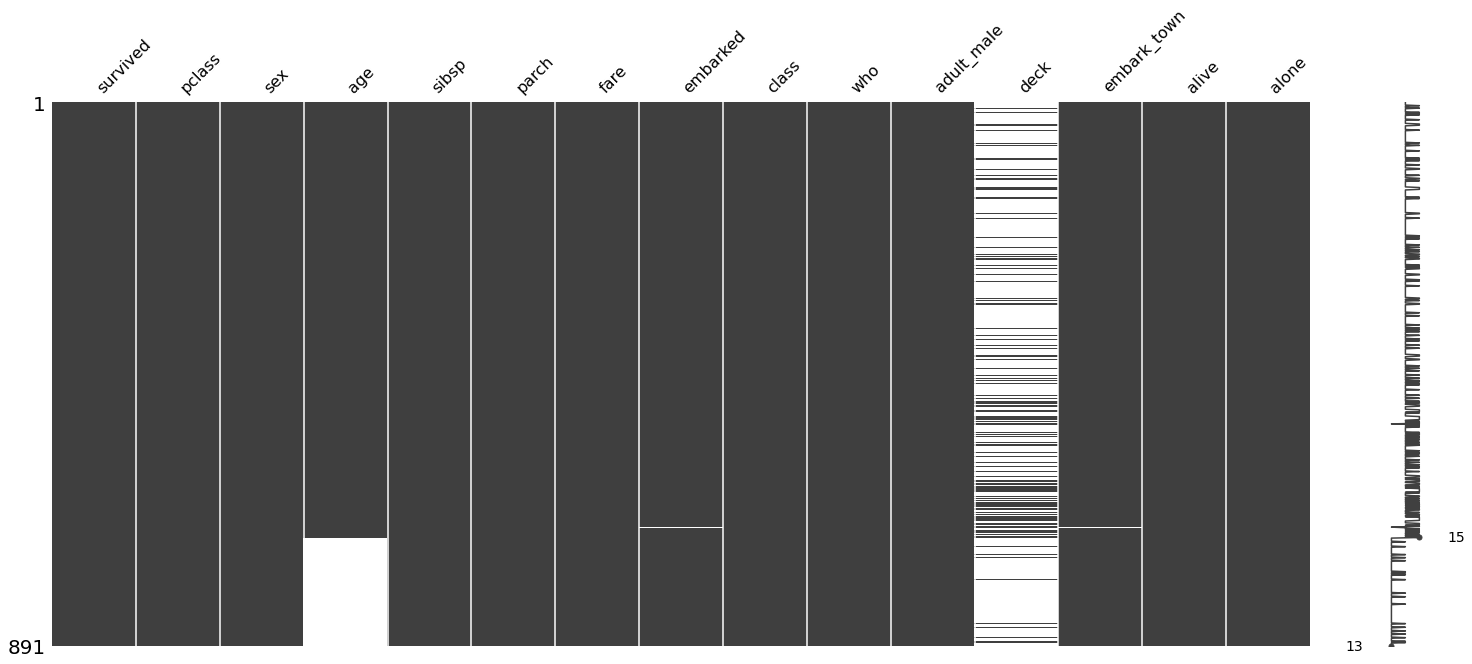

In [15]:
 msno.matrix(sorted)

Hence it is clear that here is no relation between the missingness in Age and Cabin column.To cement this conclusion further we can also draw a Heatmap among the different variables in the dataset

# Finding reason for missing data using a Heatmap

<AxesSubplot:>

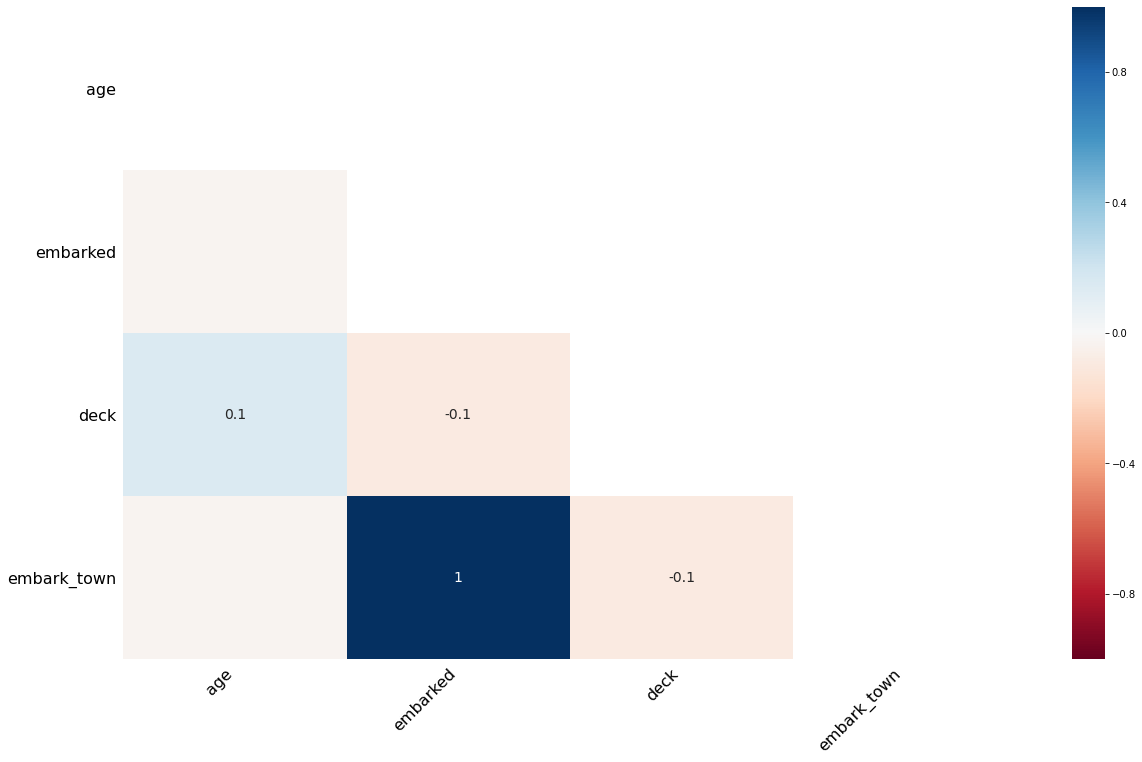

In [16]:
msno.heatmap(train)

The heatmap function shows that there are no strong correlations between missing values of different features. This is good; low correlations further indicate that the data are MAR.

# Finding reason for missing data using Dendrogram

A dendogram is a tree diagram of missingness. It groups the highly correlated variables together

<AxesSubplot:>

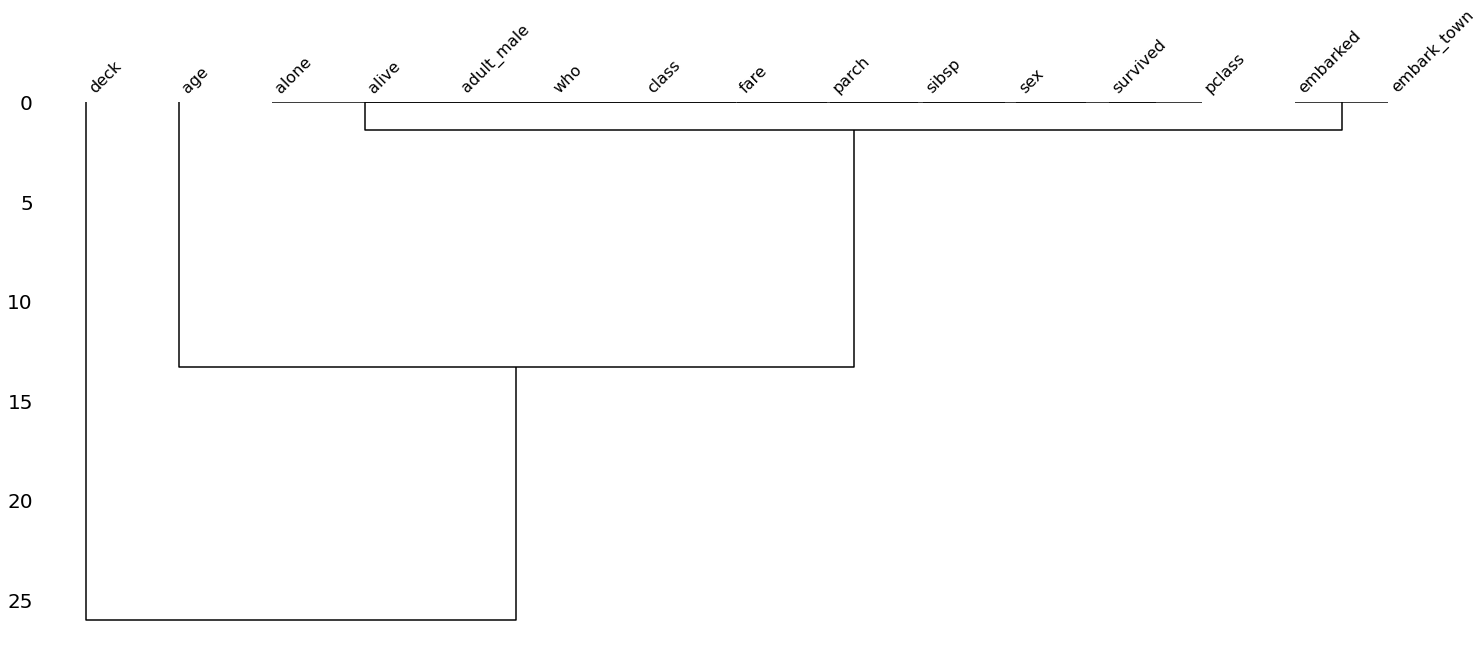

In [17]:
msno.dendrogram(train)

Cluster leaves which linked together at a distance of zero fully predict one another's presence—one variable might always be empty when another is filled, or they might always both be filled or both empty.

the missingness of Embarked tends to be more similar to Age than to Cabin and so on.However, in this particluar case, the correlation is high since Embarked column has a very few missing values.
This dataset doesn't have much missing values but if you use the same methodology on datasets having a lot of missing values, some interesting pattern will definitely emerge.

# Treating Missing Values

After having identified the patterns in missing values, it is important to treat them too. Here is a flowchart which could prove handy

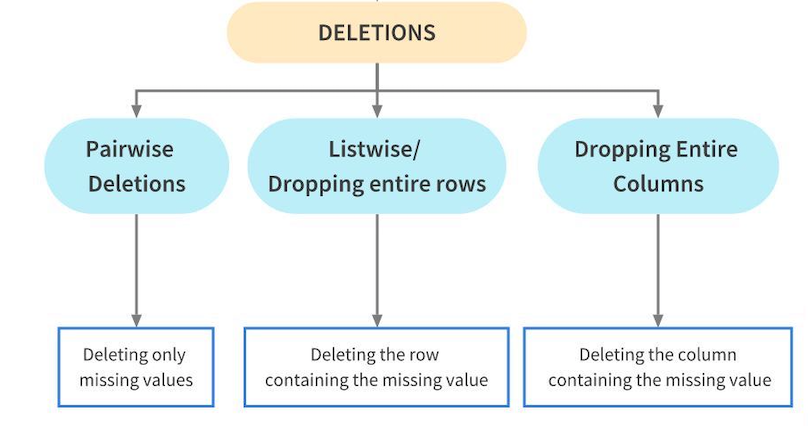

Deletion means to delete the missing values from a dataset. This is however not recommended as it might result in loss of information from the dataset. We should only delete the missing values from a dataset if their proportion is very small. Deletions are further of three types:

# Pairwise Deletion

Parwise Deletion is used when values are missing completely at random i.e MCAR. During Pairwise deletion, only the missing values are deleted. All operations in pandas like mean,sum etc intrinsically skip missing values.

In [18]:
train.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [19]:
train_1 = train.copy()
train_1['age'].mean() #pandas skips the missing values and calculates mean of the remaining values.

29.69911764705882

# Listwise Deletion/ Dropping rows

During Listwise deletion, complete rows(which contain the missing values) are deleted. As a result, it is also called Complete Case deletion. Like Pairwise deletion, listwise deletions are also only used for MCAR values.

In [20]:
#Drop rows which contains any NaN or missing value for Age column
train_1.dropna(subset=['age'],how='any',inplace=True)
train_1['age'].isnull().sum()

0

The Age column doesn't have any missing values.A major diadvantage of Listwise deletion is that a major chunk of data and hence a lot of information is lost. Hence, it is advisable to use it only when the number of missing values is very small.

# Dropping complete columns

If a column contains a lot of missing values, say more than 80%, and the feature is not significant, you might want to delete that feature. However, again, it is not a good methodology to delete data.



# Imputations Techniques for non Time Series Problems

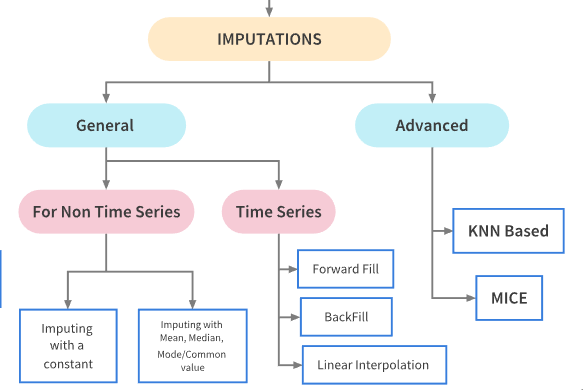

Imputation refers to replacing missing data with substituted values.There are a lot of ways in which the missing values can be imputed depending upon the nature of the problem and data. Dependng upon the nature of the problem, imputation techniques can be broadly they can be classified as follows:

# Basic Imputation Techniques

Imputating with a constant value
Imputation using the statistics (mean, median or most frequent) of each column in which the missing values are located
For this we shall use the The SimpleImputer class from sklearn.

In [21]:
from sklearn.impute import SimpleImputer
train_constant=train.copy()
mean_imputer=SimpleImputer(strategy='constant')  #Imputing using constant value
train_constant.iloc[:,:]=mean_imputer.fit_transform(train_constant)


In [22]:
train_constant.isnull().sum()

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
deck           0
embark_town    0
alive          0
alone          0
dtype: int64

In [23]:
from sklearn.impute import SimpleImputer
train_most_frequent = train.copy()
#setting strategy to 'mean' to impute by the mean
mean_imputer = SimpleImputer(strategy='most_frequent')# strategy can also be mean or median 
train_most_frequent.iloc[:,:] = mean_imputer.fit_transform(train_most_frequent)


In [24]:
train_most_frequent.isnull().sum()

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
deck           0
embark_town    0
alive          0
alone          0
dtype: int64

# Imputation Techniques for Time Series Problem

Now let's look at ways to impute data in a typical time series problem. Tackling missing values in time Series problem is a bit different. The fillna() method is used for imputing missing values in such problems.

# Time Series Dataset

The dataset is called Air Quality Data in India (2015 - 2020) Tand it contains air quality data and AQI (Air Quality Index) at hourly and daily level of various stations across multiple cities in India.The dataset has a lot of missing values and and is a classic Time series problem.

In [25]:
import pandas as pd

In [26]:
city_day=pd.read_csv('cities_by_day.csv')
city_hour=pd.read_csv('cities_by_hours.csv')

In [27]:
city_day.head()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,C6H6,C7H8,C8H10,AQI,AQI_Bucket
0,Ahmedabad,1/1/2015,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
1,Ahmedabad,1/2/2015,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2,Ahmedabad,1/3/2015,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
3,Ahmedabad,1/4/2015,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
4,Ahmedabad,1/5/2015,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN


In [28]:
city_hour.head()

,City,Datetime,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,C6H6,C7H8,C8H10,AQI,AQI_Bucket
0,Ahmedabad,1/1/2015 1:00,NaN,NaN,1.00,40.01,36.37,NaN,1.00,122.07,NaN,0.0,0.0,0.0,NaN,NaN
1,Ahmedabad,1/1/2015 2:00,NaN,NaN,0.02,27.75,19.73,NaN,0.02,85.90,NaN,0.0,0.0,0.0,NaN,NaN
2,Ahmedabad,1/1/2015 3:00,NaN,NaN,0.08,19.32,11.08,NaN,0.08,52.83,NaN,0.0,0.0,0.0,NaN,NaN
3,Ahmedabad,1/1/2015 4:00,NaN,NaN,0.30,16.45,9.20,NaN,0.30,39.53,153.58,0.0,0.0,0.0,NaN,NaN
4,Ahmedabad,1/1/2015 5:00,NaN,NaN,0.12,14.90,7.85,NaN,0.12,32.63,NaN,0.0,0.0,0.0,NaN,NaN


In [29]:
# Misiing Values
city_day.isnull().sum()

City              0
Date              0
PM2.5          4598
PM10          11140
NO             3582
NO2            3585
NOx            4185
NH3           10328
CO             2059
SO2            3854
O3             4022
C6H6           5623
C7H8           8041
C8H10         18109
AQI            4681
AQI_Bucket     4681
dtype: int64

In [30]:
city_day.columns

Index(['City', 'Date', 'PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2',
       'O3', 'C6H6', 'C7H8', 'C8H10', 'AQI', 'AQI_Bucket'],
      dtype='object')

In [31]:
missing_values_table(city_day)

Your selected dataframe has 16 columns.
There are 14 columns that have missing values.


,Missing Values,% of Total Values
C8H10,18109,61.3
PM10,11140,37.7
NH3,10328,35.0
C7H8,8041,27.2
C6H6,5623,19.0
AQI,4681,15.9
AQI_Bucket,4681,15.9
PM2.5,4598,15.6
NOx,4185,14.2
O3,4022,13.6


There are a lot of missing values and some of the columns like Xylene have more than 50% of the values missing. Let's now see how we can impute these missing values.

In [32]:
# Imputation using ffill/pad
# Imputing Xylene value

city_day['C8H10'][50:64]

50     7.48
51    15.44
52     8.47
53    28.46
54     6.05
55     0.81
56      NaN
57      NaN
58      NaN
59     1.32
60     0.22
61     2.25
62     1.55
63     4.13
Name: C8H10, dtype: float64

# Imputing using ffill

In [33]:
city_day.fillna(method='ffill',inplace=True)
city_day['C8H10'][50:65]

50     7.48
51    15.44
52     8.47
53    28.46
54     6.05
55     0.81
56     0.81
57     0.81
58     0.81
59     1.32
60     0.22
61     2.25
62     1.55
63     4.13
64     4.13
Name: C8H10, dtype: float64

We can see that all missing values have been filled with the last observed values.

# Imputing using bfill

In [34]:
city_day['AQI'][20:30]

20      NaN
21      NaN
22      NaN
23      NaN
24      NaN
25      NaN
26      NaN
27      NaN
28    209.0
29    328.0
Name: AQI, dtype: float64

In [35]:
city_day.fillna(method='bfill',inplace=True)
city_day['AQI'][20:30]

20    209.0
21    209.0
22    209.0
23    209.0
24    209.0
25    209.0
26    209.0
27    209.0
28    209.0
29    328.0
Name: AQI, dtype: float64

We can see that all missing values have been filled with the next observed values.

# Imputation using Linear Interpolation method


Time series data has a lot of variations against time. Hence, imputing using backfill and forward fill isn't the ebst possible solution to address the missing value problem. A more apt alternative would be to use interpolation methods, where the values are filled with incrementing or decrementing values.

Linear interpolation is an imputation technique that assumes a linear relationship between data points and utilises non-missing values from adjacent data points to compute a value for a missing data point.

In [36]:
city_day['C8H10'][50:65]

50     7.48
51    15.44
52     8.47
53    28.46
54     6.05
55     0.81
56     0.81
57     0.81
58     0.81
59     1.32
60     0.22
61     2.25
62     1.55
63     4.13
64     4.13
Name: C8H10, dtype: float64

In [37]:
city_hour['C8H10'][707860:707875]

707860    0.0
707861    0.0
707862    0.0
707863    0.0
707864    0.0
707865    0.0
707866    0.0
707867    0.0
707868    NaN
707869    NaN
707870    NaN
707871    NaN
707872    NaN
707873    NaN
707874    NaN
Name: C8H10, dtype: float64

In [38]:
# Interpolate using the linear method
city_hour.interpolate(limit_direction="both",inplace=True)
city_hour['C8H10'][707860:707875]

707860    0.0
707861    0.0
707862    0.0
707863    0.0
707864    0.0
707865    0.0
707866    0.0
707867    0.0
707868    0.0
707869    0.0
707870    0.0
707871    0.0
707872    0.0
707873    0.0
707874    0.0
Name: C8H10, dtype: float64

# Advanced Imputation Techniques

Advanced imputation techniques uses machine learning algorithms to impute the missing values in a dataset unlike the previous techniques where we used other column values to predict the missing values. We shall look at the following two techniques in this notebook:

# 1.Nearest neighbors imputation

The KNNImputer class provides imputation for filling in missing values using the k-Nearest Neighbors approach.Each missing feature is imputed using values from n_neighbors nearest neighbors that have a value for the feature. The feature of the neighbors are averaged uniformly or weighted by distance to each neighbor.



In [39]:
df=pd.read_csv('cities_by_day.csv')

In [40]:
df.head()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,C6H6,C7H8,C8H10,AQI,AQI_Bucket
0,Ahmedabad,1/1/2015,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
1,Ahmedabad,1/2/2015,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2,Ahmedabad,1/3/2015,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
3,Ahmedabad,1/4/2015,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
4,Ahmedabad,1/5/2015,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN


In [44]:
train_knn=df.copy(deep=True)
train=sns.load_dataset('titanic')

In [43]:
from sklearn.impute import KNNImputer

In [49]:
from sklearn.impute import KNNImputer
train_knn = train.copy(deep=True)

knn_imputer = KNNImputer(n_neighbors=2, weights="uniform")
train_knn['age'] = knn_imputer.fit_transform(train_knn[['age']])

In [50]:
train_knn['age'].isnull().sum()

0

# Multivariate feature imputation - Multivariate imputation by chained equations (MICE)

A strategy for imputing missing values by modeling each feature with missing values as a function of other features in a round-robin fashion. It performns multiple regressions over random sample ofthe data, then takes the average ofthe multiple regression values and uses that value to impute the missing value. In sklearn, it is implemented as follows:



In [51]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
train_mice = train.copy(deep=True)

mice_imputer = IterativeImputer()
train_mice['age'] = mice_imputer.fit_transform(train_mice[['age']])

In [53]:
train_mice['age'].isnull().sum()

0

# Algorithms which handle missing values

# 1. XGBoost

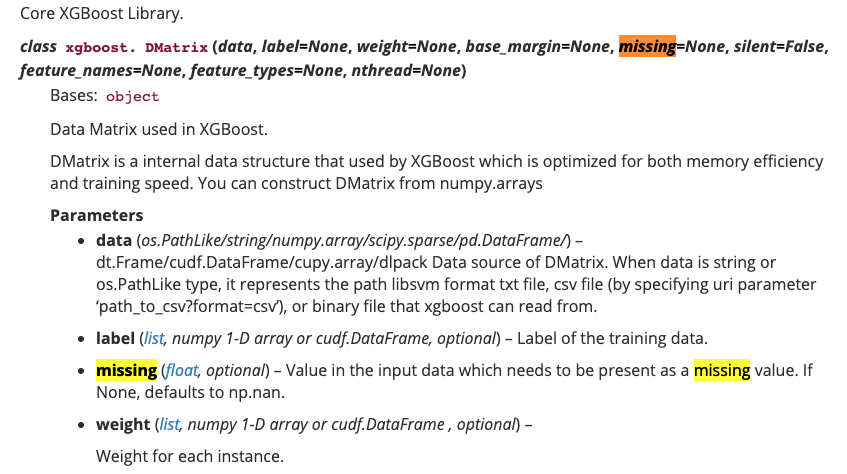

# 2.LightGBM

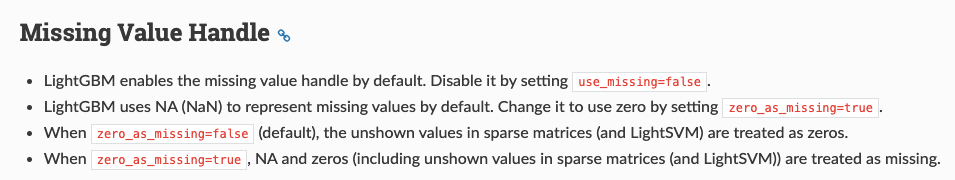

# Conclusion

Well, there is no single best way to handle missing values. One needs to experiment with different methods and then decide which method is best for a particular problem.